In [1]:
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import json
from collections import defaultdict
import matplotlib.pyplot as plt
import sklearn

In [48]:
data1 = pd.read_json('CostJsonData.json')
# Json file taken from https://worldpopulationreview.com/state-rankings/cost-of-living-index-by-state 

df1 = data1.copy(deep=True)

df1.drop(["groceryCost", "housingCost", "utilitiesCost", "transportationCost", "miscCost"], axis=1, inplace=True)
df1.rename(columns = {'state':'State'}, inplace = True)
df1.rename(columns = {'costIndex':'Cost To Live Index'}, inplace = True)

Here we have our dataset of the states ranked by their cost of living index. Cleaning it up a bit gives us the cost of index, with other categories removed.

In [50]:
data2 = pd.read_json('UnemJsonData.json')
# Json file taken from https://worldpopulationreview.com/state-rankings/unemployment-rate-by-state 

df_2 = data2.copy(deep=True)

df_2.drop(["rate21"], axis=1, inplace=True)
df_2.rename(columns = {'state':'State'}, inplace = True)
df_2.rename(columns = {'rate22':'Unemployment Rate'}, inplace = True)

df2 = df_2.reindex([31, 7, 10, 19, 17, 26, 9, 8, 36, 12, 24, 49, 42, 39, 40, 30, 33, 22, 1, 45, 21, 27, 20, 5, 3, 0, 13, 14, 6, 16, 11, 43, 23, 25, 46, 44, 2, 35, 18, 34, 4, 15, 32, 38, 48, 29, 28, 37, 47, 41])

output1 = pd.merge(df1, df2, how='inner')

Here is the dataset for the unemployment rankings of the states. After cleanup it was reindexed so that the state rankings of the second dataset match the first dataset, and then merged.

In [52]:
data3 = pd.read_json('EducJsonData.json')
# Json file taken from https://worldpopulationreview.com/state-rankings/best-states-for-education 

df_3 = data3.copy(deep=True)

df_3.drop(["higherEducationRank"], axis=1, inplace=True)
df_3.drop(["prek12Rank"], axis=1, inplace=True)
df_3.rename(columns = {'state':'State'}, inplace = True)
df_3.rename(columns = {'overallRank':'Education Rank'}, inplace = True)

df3 = df_3.reindex([42, 22, 46, 41, 25, 32, 29, 17, 44, 21, 40, 49, 37, 30, 33, 47, 35, 43, 8, 10, 20, 6, 7, 24, 9, 16, 2, 31, 18, 11, 28, 36, 45, 4, 39, 23, 12, 3, 27, 0, 14, 38, 5, 13, 48, 34, 1, 19, 15, 26])

finalset = pd.merge(output1, df3, how='inner')

The third data set is the education rankings of the states. After more cleanup and reindexing, it was merged with the resultant dataset of the first and second datasets.

In [7]:
finalset.to_csv("CleanedSet.csv")

In [53]:
rankings = pd.read_csv("CleanedSet.csv")
rankings.drop(["Unnamed: 0"], axis=1, inplace=True)
rankings.head(n=50)

,State,Cost To Live Index,Unemployment Rate,Education Rank
0,Mississippi,83.3,3.6,43
1,Kansas,86.5,2.4,23
2,Alabama,87.9,2.6,47
3,Oklahoma,87.9,3.0,42
4,Georgia,88.8,2.8,26
5,Tennessee,89.0,3.3,33
6,Missouri,89.8,2.5,30
7,Iowa,89.9,2.5,18
8,West Virginia,90.5,3.7,45
9,Indiana,90.6,2.6,22


In [9]:
others = rankings.copy(deep=True)
others.drop(["Education Rank"], axis=1, inplace=True)
others.drop(["State"], axis=1, inplace=True)
cols = others.columns.tolist()

In [10]:
education = rankings['Education Rank'].copy()

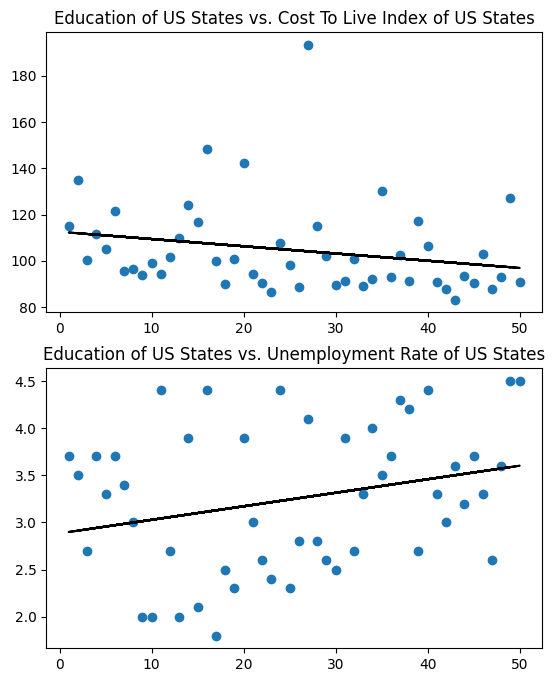

In [55]:
figure, axis = plt.subplots(2)
figure.set_figheight(8)
for i in range(0, 2):
    axis[i].scatter(education, others[cols[i]])
    axis[i].set_title(f"Education of US States vs. {cols[i]} of US States")
    m, b = np.polyfit(education, others[cols[i]], 1)
    axis[i].plot(education, m * education + b, color='black')

A scatterplot of the data shows that while the unemployment rate seems to have only a slight positive correlation with education at best, there is a negative correlation between education and cost of living. This means that as the education ranking of a state is high, its cost of living will be low. 

In [66]:
model = rankings.copy(deep=True)
model_sub = model.iloc[:, [1,2,3]]

In [58]:
X = model_sub.iloc[:, [0] + list(range(1, 2))]
y = model_sub['Education Rank']
cols = X.columns.tolist()

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X.iloc[:, 0:3], y)
y_pred = model.predict(X.iloc[:, 0:3])
print("Mean Squared Error:", mean_squared_error(y, y_pred))

Mean Squared Error: 170.73933645114172


While this MSE is on the higher end, it is mostly because of state outliers like Hawaii (with a cost of living index of 193.3 and an education ranking of 27), and there not being a strong linear correlation between the variables.

In [69]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X.iloc[:, 0:3], y)
y_pred = regressor.predict(X.iloc[:, 0:3])

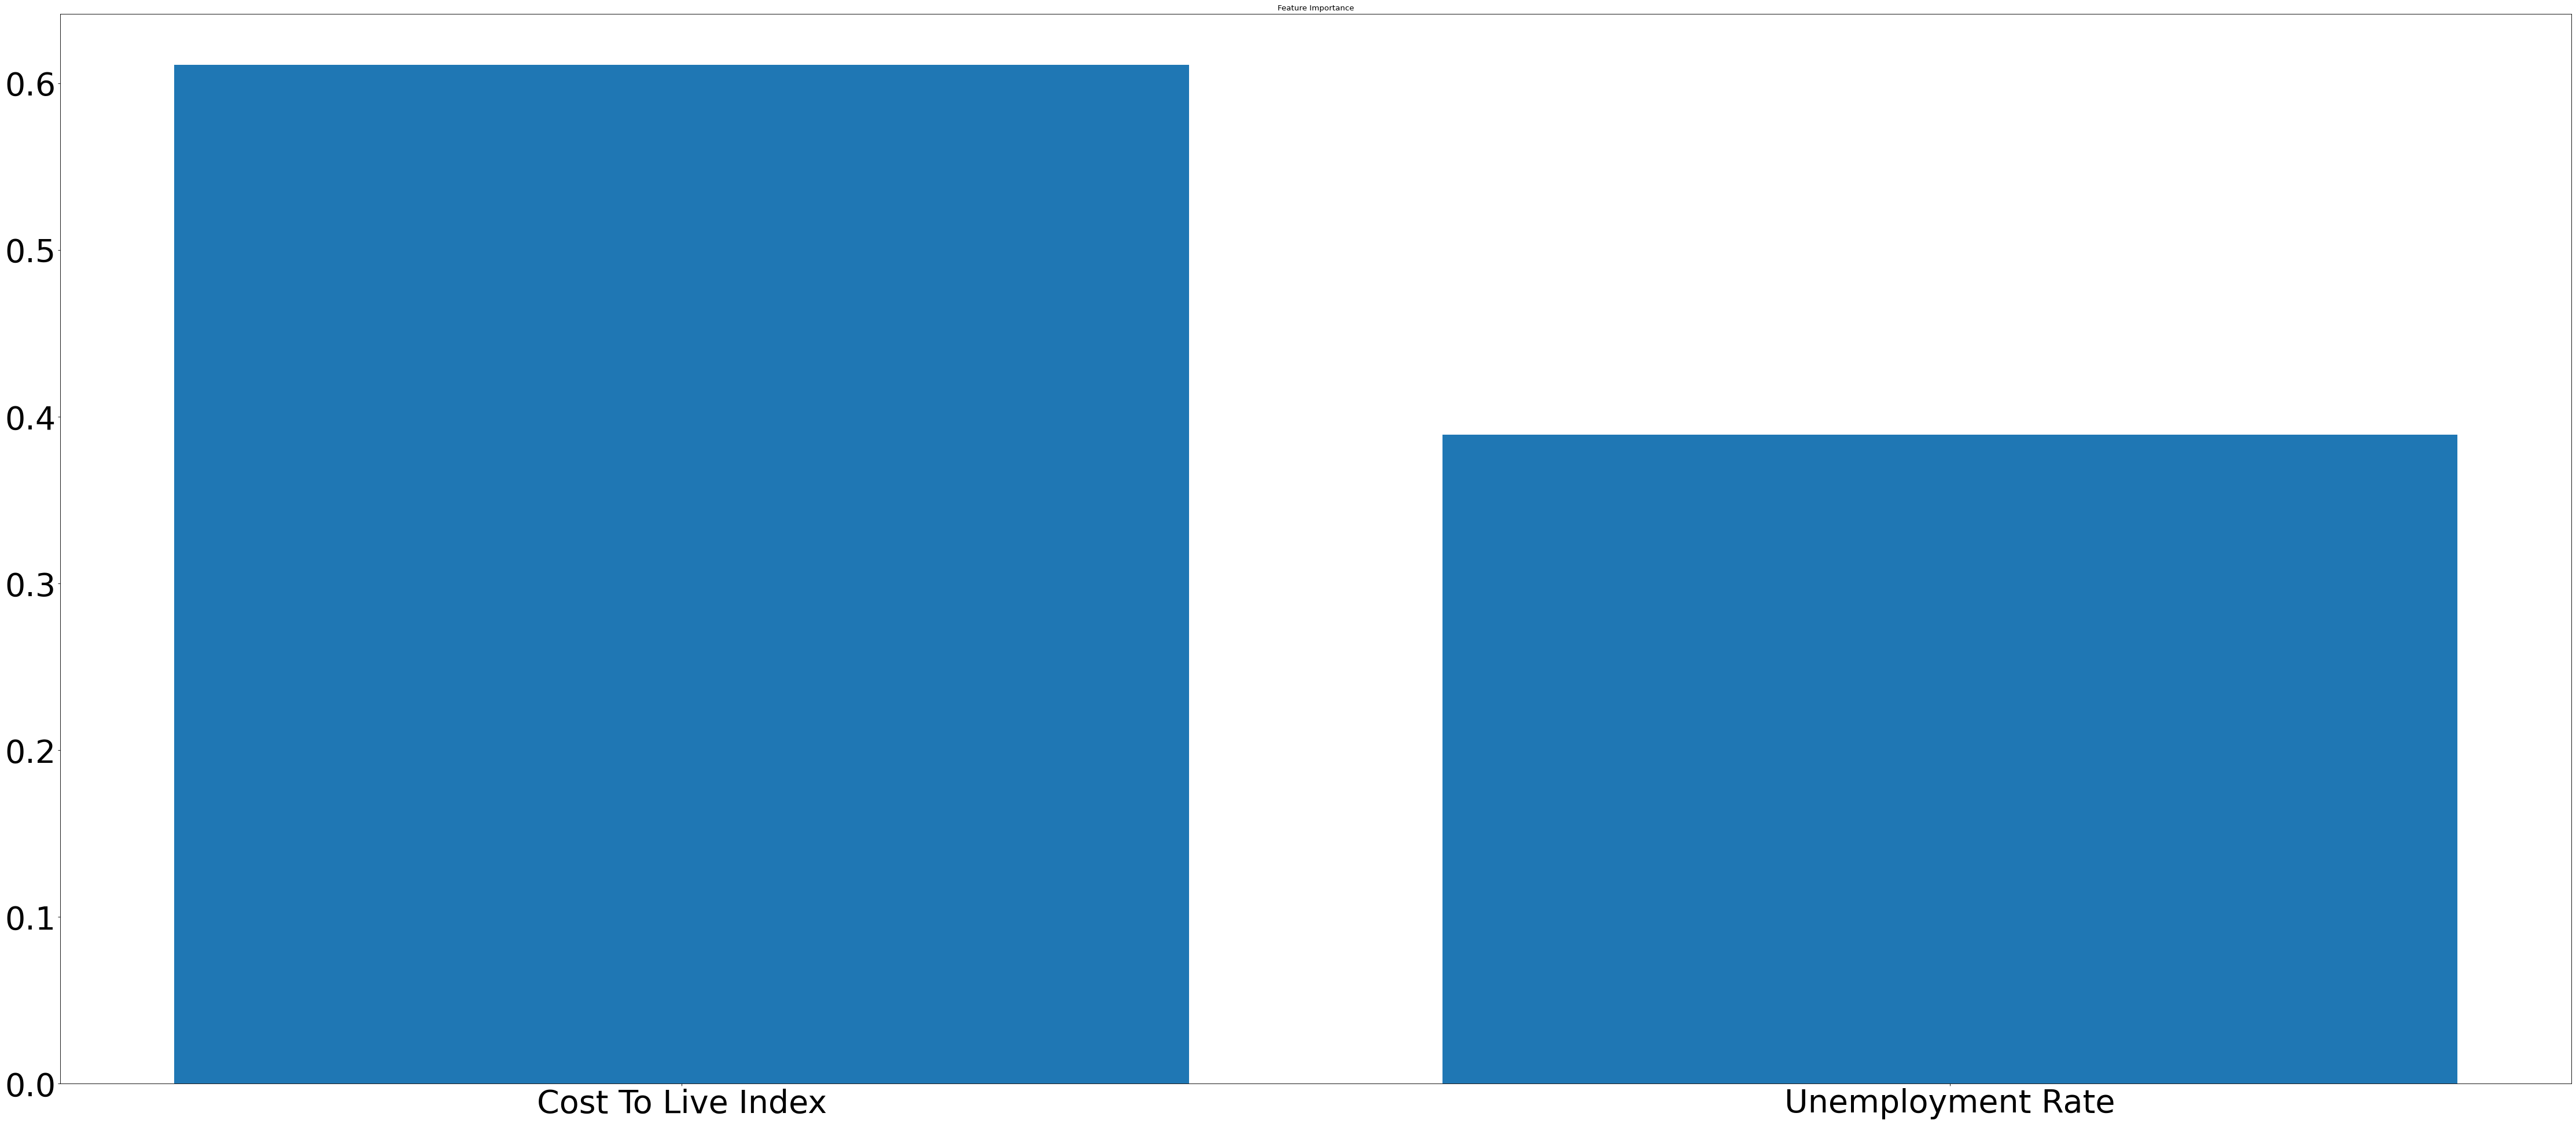

In [70]:
from matplotlib.pyplot import figure

figure(figsize=(70, 30), dpi=80)
feature_importance_dt = regressor.feature_importances_
feature_names = X.iloc[:, 0:3].columns

plt.bar(feature_names, feature_importance_dt.ravel())
plt.tick_params(axis='both', which='major', labelsize=50)
plt.title("Feature Importance")
plt.show()

In [45]:
var = {"feature":cols, "feature_importance":feature_importance_dt.ravel()}
pd.DataFrame(var)

,feature,feature_importance
0,Cost To Live Index,0.672504
1,Unemployment Rate,0.327496


Like the scatterplots earlier, the feature importance graph above shows that there is a stronger relationship between education and the cost to live index than there is for education and unemployment rate, which is outlined more clearly in the table.

## Conclusion

At the start of the project, my hypothesis was that education would be positively related to the cost of living index, and negatively related to the unemployment rate. While the unemployment rate relation is inconclusive, the visualization and modeling showed that education was instead negatively related to the cost of living index.

This is surprising, as I expected states with a higher education ranking to have a higher cost of living index, due to things like higher taxes because of better public school systems. In a news article I read recently (which sparked the idea for this project) it was also mentioned that states that lean or mostly vote blue tend to have people with the most education, and those states typically have higher taxes, or are oftentimes cities as opposed to rural areas with low costing goods. However, the data shows the opposite. 

It could be that more educated people are choosing to make better policy decisions and help their state have a lower cost of living index, or for many other reasons.

##### Does Education Really Improve Quality of Life?
was one of the focus questions of the project. I would say a low cost of living is a factor in having a good quality of life, so as it relates to cost of living, the data says yes. 